### Install jsonlines if you need it

import sys
!conda install --yes --prefix {sys.prefix} jsonlines

### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import jsonlines

## Read the simulation output

First as raw JSON lines

In [4]:
HISTORY_FILE = '../data1K-3agents/data/history_file_static_lottery.json'

In [5]:
history = []
with jsonlines.open(HISTORY_FILE) as reader:
    for obj in reader:
        history.append(obj)

Functions to process the history

In [6]:
def process_history(history, fair=True, compat=True, alloc=True, lists=True):
    if fair:
        fair_list = [entry['allocation']['fairness scores'] for entry in history]
        fair_df = pd.DataFrame(fair_list)
    else:
        fair_df = None
        
    if compat:
        compat_list = [entry['allocation']['compatibility scores'] for entry in history]
        compat_df = pd.DataFrame(compat_list)
    else:
        compat_df = None
        
    if alloc:
        alloc_list = [entry['allocation']['output'] for entry in history]
        alloc_df = pd.DataFrame(alloc_list)
    else:
        alloc_df = None
        
    if lists:
        results_list = [process_results(entry['choice']['output']['results']) for entry in history]
    else:
        results_list = None
        
    return fair_df, compat_df, alloc_df, results_list

def process_results(result_structs):
    return [(entry['item'], entry['score']) for entry in result_structs]
        

Get the individual data frames and result lists

In [7]:
fair_df, compat_df, alloc_df, results = process_history(history)

In [8]:
fair_df

,Agent1,Agent2,Agent3
0,1.000000,1.000000,1.0
1,1.000000,0.000000,0.0
2,0.666667,1.000000,0.0
3,0.888889,0.666667,0.0
4,0.933333,0.500000,0.0
...,...,...,...
995,0.453333,1.000000,0.0
996,0.320000,1.000000,0.0
997,0.453333,1.000000,0.0
998,0.493333,0.940000,0.0


In [9]:
compat_df

,Agent1,Agent2,Agent3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
995,0.0,0.0,1.0
996,0.0,0.0,1.0
997,0.0,0.0,1.0
998,0.0,0.0,1.0


In [10]:
alloc_df

,Agent1,Agent2,Agent3
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
995,0.0,1.0,0.0
996,1.0,0.0,0.0
997,0.0,0.0,1.0
998,0.0,0.0,1.0


In [11]:
results[0]

[('65', 1.4129639827372158),
 ('73', 1.3994325233214566),
 ('5', 1.3765432820943035),
 ('11', 1.3751718583706776),
 ('35', 1.3532424365638112),
 ('67', 1.3468106643943747),
 ('66', 1.3358143213450384),
 ('54', 1.3190561891142276),
 ('89', 1.2802388085484964),
 ('47', 1.2390769789758758)]

## Visualizations

Simple plot of the fairness values computed at each iteration

<AxesSubplot:>

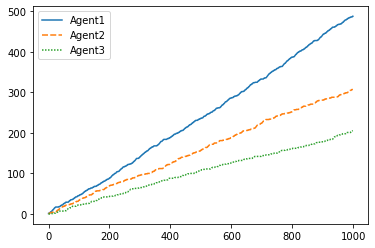

In [13]:
sb.lineplot(data=alloc_df.cumsum())

<AxesSubplot:>

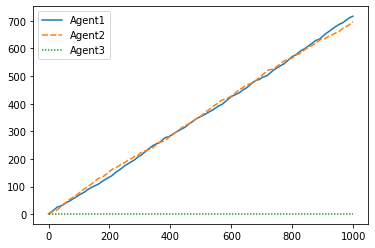

In [14]:
sb.lineplot(data=fair_df.cumsum())

Same for allocation

In [ ]:
alloc_df_melt = alloc_df.reset_index().melt(id_vars=['index'])
sb.stripplot(data=alloc_df_melt, x='index', y='value', hue='variable', dodge=True)

KeyboardInterrupt: 

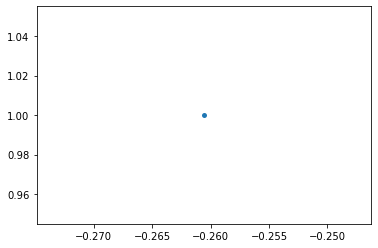

In [12]:
fair_df_melt = fair_df.reset_index().melt(id_vars=['index'])
sb.stripplot(data=fair_df_melt, x='index', y='value', hue='variable', dodge=True)

<AxesSubplot:>

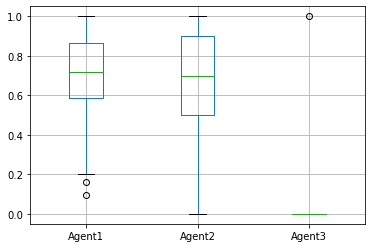

In [35]:
fair_df.boxplot()

ValueError: Could not interpret input 'index'

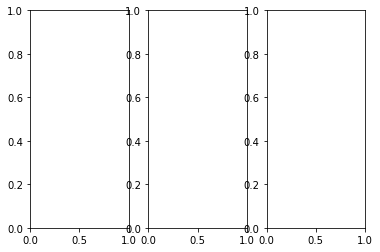

In [30]:
# Store the list of columns
columns_to_plot = ['Agent1','Agent2','Agent3']

# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(columns_to_plot))

# Create the boxplot with Seaborn
for column, axis in zip(columns_to_plot, axes):
        sb.boxplot(data=fair_df[column], x='index', y='value', hue = 'variable', ax = axis) 
        axis.set_title(column)


# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
sb.stripplot(data=fair_df_melt, x='index', y='value', hue='variable', dodge=True)

In [19]:
sb.stripplot(data=alloc_df_melt, x='index', y='value', hue='variable', dodge=True)

NameError: name 'alloc_df_melt' is not defined

In [ ]:
sb.boxplot(data=alloc_df_melt, x='index', y='value', hue='variable')